In [10]:
import ccdproc, sys
from pathlib import Path
from astropy.nddata import CCDData
#sys.path.insert(1, '/Users/kirstencasey/projects/LBCreduce/lbcred')
#import image, reduce, 
import time, os
from astropy import stats
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#### Call function to get images
lbc_raw = Path('/Volumes/WD-EXFAT/Images/lbc-raw/')
#lbc_red = Path('/Volumes/WD-EXFAT/Images/','lbc-reduced')
#lbc_red.mkdir(exist_ok=True)
keys = ['imagetyp', 'filter', 'propid', 'object', 'pi_name']
all_files = ccdproc.ImageFileCollection(lbc_raw,ext=1, keywords=keys,glob_include='*20191220.1*',glob_exclude='*4*')
for file in all_files.data():
    print(file)

[[  0 326 324 ... 300 314 624]
 [  0 323 319 ... 289 303 624]
 [  0 317 325 ... 286 295 624]
 ...
 [  0 273 272 ... 250 248 512]
 [  0 278 275 ... 258 267 512]
 [  0 285 276 ... 243 256 496]]
[[  0 273 275 ... 251 250 496]
 [  0 274 279 ... 245 251 496]
 [  0 260 264 ... 251 247 496]
 ...
 [  0 285 272 ... 253 251 512]
 [  0 277 260 ... 260 264 496]
 [  0 276 275 ... 252 252 512]]
[[  0 271 280 ... 254 252 496]
 [  0 274 275 ... 251 250 496]
 [  0 281 276 ... 254 248 512]
 ...
 [  0 275 271 ... 249 256 512]
 [  0 276 276 ... 258 262 512]
 [  0 290 280 ... 241 249 512]]
[[  0 281 271 ... 259 254 496]
 [  0 272 289 ... 246 265 496]
 [  0 280 268 ... 251 247 512]
 ...
 [  0 274 282 ... 249 252 512]
 [  0 274 278 ... 260 260 512]
 [  0 281 274 ... 244 244 496]]
[[  0 280 265 ... 258 246 496]
 [  0 285 279 ... 253 249 496]
 [  0 276 276 ... 250 260 496]
 ...
 [  0 265 274 ... 258 255 496]
 [  0 278 275 ... 266 266 512]
 [  0 280 282 ... 244 253 496]]
[[  0 269 277 ... 257 258 512]
 [  0 271

In [38]:
#### Call function to calibrate bias images and make master bias
keys = ['imagetyp', 'filter', 'propid', 'object']
#biases_raw = all_files.files_filtered(include_path=True,select['imagetyp']=select['imagetyp'])
# Loop through bias images and calibrate each one (subtract overscan and trim)
# Combine all bias images
# Return 'master' bias

In [4]:
# Call function to do biasing

In [5]:
# Call function to do flat fielding

In [6]:
# Call function to stack images/do astrometry

In [6]:
keys = ['imagetyp','object','filter',]
collection = ccdproc.ImageFileCollection(lbc_raw, keywords=keys, ext=1)
sub_collection = collection.files_filtered(imagetyp='object',filter='B-BESSEL',object='*')
collection.values('object',unique=True)

['NGC628KDG10',
 'M81blob',
 'BinoBias',
 'DDO13_UGC01171',
 'SkyFlat',
 'NGC628LSB',
 'faint',
 'TYC 1205-1173-1',
 'KK17',
 'TYC 627-39-1',
 'NGC628 smiley',
 'DDO043',
 'AGC748778',
 'TYC 1205-1342-1',
 'KK15',
 'UGC685']

In [31]:
print(collection.summary)

           file           imagetyp  object  filter 
------------------------- -------- ------- --------
lbcb.20191220.003943.fits     flat SkyFlat SDT_Uspe
lbcb.20191220.004029.fits     flat SkyFlat SDT_Uspe
lbcb.20191220.004110.fits     flat SkyFlat SDT_Uspe
lbcb.20191220.004155.fits     flat SkyFlat SDT_Uspe
lbcb.20191220.004237.fits     flat SkyFlat SDT_Uspe
lbcb.20191220.004615.fits     flat SkyFlat B-BESSEL
lbcb.20191220.004658.fits     flat SkyFlat B-BESSEL
lbcb.20191220.004744.fits     flat SkyFlat B-BESSEL
lbcb.20191220.004910.fits     flat SkyFlat B-BESSEL
lbcb.20191220.005038.fits     flat SkyFlat V-BESSEL
                      ...      ...     ...      ...
lbcr.20191222.052427.fits   object    KK17 R-BESSEL
lbcr.20191222.052542.fits   object    KK17 R-BESSEL
lbcr.20191222.053122.fits   object    KK17 R-BESSEL
lbcr.20191222.053239.fits   object    KK17 R-BESSEL
lbcr.20191222.053819.fits   object    KK17 R-BESSEL
lbcr.20191222.053944.fits   object    KK17 R-BESSEL
lbcr.2019122

In [48]:
imtype='*'
objectname='UGC685'
filt='*'

images = collection.filter(imagetyp=imtype, object=objectname, filter=filt)
options = {}
options['imtype'] = images.values('imagetyp', unique=True)
options['objectname'] = images.values('object', unique=True)
options['filt'] = images.values('filter', unique=True)
print('Options','-------',sep='\n')
print('\n','imtype: ', options['imtype'],sep='')
print('\n','objectname: ', options['objectname'], sep='')
print('\n', 'filt: ', options['filt'], sep='')

Options
-------

imtype: ['object']

objectname: ['UGC685']

filt: ['B-BESSEL', 'R-BESSEL']


In [7]:
images = image.get_images('/Volumes/WD-EXFAT/Images/lbc-raw/', objectname='KK17', filt='R-BESSEL');

In [25]:
len(images.summary)

16

In [47]:
means1 = []
for im in images.data():
    mean = stats.sigma_clip(im, sigma=3, maxiters=3).mean()
    means1.append(mean)
    print(im.stddev)

AttributeError: 'numpy.ndarray' object has no attribute 'stddev'

In [45]:
means2 = []
for im in images.data():
    mean = im.mean()
    means2.append(mean)

In [46]:
np.asarray(means1)-np.asarray(means2)

array([1168.52664821,  120.7718156 , 1150.65100414,   96.80109063,
       1166.52538484,  112.80384252, 1188.94975444,  125.10706768,
       1272.26788388,  126.78458644, 1234.15903583,  124.62784779,
       1253.6869325 ,  117.28858983, 1159.0992192 ,  111.17959801])

In [19]:
i=0
for im in images.data():
    if i==0:
        clipped = stats.sigma_clip(im,sigma=5, cenfunc='median', stdfunc=stats.mad_std)
        im0 = im
    i+=1

In [24]:
clipped.std()

278.13776542352724

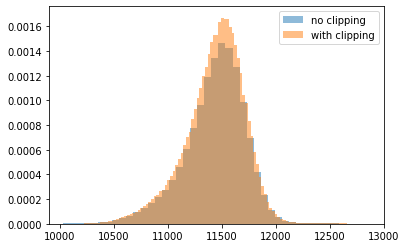

In [38]:
clipped_nonan = clipped[~np.isnan(clipped)]
plt.hist(np.ndarray.flatten(im0),density=True,bins=1000,alpha=0.5,label='no clipping')
plt.hist(np.ndarray.flatten(clipped_nonan),density=True,bins=100,alpha=0.5,label='with clipping')
plt.xlim(9900,13000)
plt.legend()
plt.show()

In [ ]:
def get_images(directory, imtype='*', objectname='*', filt='*', display_options=False):
	'''
	This function returns a list of images given input parameters specifying the type of images needed.

	Parameters
	----------
	directory : str
		The directory in which getImages should look for .fits files.

	imtype : str
		The IMAGETYP keyword in the header of the .fits files to be returned. Used to indicate whether
		the returned images should be flats, biases, objects, etc.

	objectname : str
		The OBJECT keyword in the header of the .fits files to be returned. Used to indicate which
		target (eg. UGC1171, NGC628, etc.) is desired.

	filt : str
		The FILTER keyword in the header of the .fits files to be returned. Used to indicate which
		telescope filter (eg. B-BESSEL, R-BESSEL, etc.) is desired.

	display_options : bool
		If True, get_images will not return a list of images but will instead return a dict of available
		options for each other input parameter (imtype, objectname, redlevel) based on the contents of
		the .fits headers in the given directory.

	Returns
	-------
	ImageFileCollection (when display_options == False)
		Returns an ImageFileCollection object containing information about images consistent with the input parameters

	'''

	path = Path(directory)
	keys = ['imagetyp','object','filter','propid','exptime']
	all_images = ImageFileCollection(path, keywords=keys)

	try:
		images = all_images.filter(imagetyp=imtype, object=objectname, filter=filt)
	except FileNotFoundError:
		print('No images match the given options.')
		return

	if display_options:
		options = {}

		options['imtype'] = images.values('imagetyp', unique=True)
		options['objectname'] = images.values('object', unique=True)
		options['filt'] = images.values('filter', unique=True)

		print('Options','-------',sep='\n')
		print('\n','imtype:', options['imtype'], sep='')
		print('\n', 'objectname:', options['objectname'], sep='')
		print('\n', 'filt:', options['filt'], sep='')

	else:

		images = all_images.filter(imagetyp=imtype, object=objectname, filter=filt)

		return images

In [10]:
image_dir = './'
datetime = time.strftime('%Y-%m-%d_%H:%M:%S',time.gmtime())
out_dir_default = image_dir + f'../lbcreduce_{datetime}'
out_dir_default

'./../lbcreduce_2020-02-19_18:15:47'

In [29]:
os.path.isdir('test')

True

In [32]:
dir_exists = True
overwrite = True

dir_exists and not overwrite

False

In [55]:
import sys
def more_stuff():
    sys.exit('Program ended')
    
def do_stuff(num):
    if num == 0:
        more_stuff()
    else:
        print('Hi')
    print('agian')

In [56]:
do_stuff(0)

SystemExit: Program ended

# Test
try `python` today!

# Test1

Link to [Test](#Test)

In [3]:
image_dir = '../lbcred/'
#os.chdir(image_dir)
os.path.abspath(image_dir+'../notebooks')

'/Users/kirstencasey/projects/LBCreduce/notebooks'